# forming X DataSet

In [1]:
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string
import pickle

In [2]:
#stopwords
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list having tuple in which first element is name of document and second is the text in documents.
#Y is the category/class

X  =[] 
Y = []
path= "20_newsgroups"
for category in os.listdir(path):
    for document in os.listdir(path + "\\" + category):
        with open(path + "\\" + category+ '\\'+ document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))

print(X[0])  # one element of X

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [5]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [6]:
print(len(x_train))
print(len(x_test))

11997
4000


In [7]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        if s.isalpha() and s not in stop_word and len(s)>2:
            dic[s]= dic.get(s, 0) + 1

dic

{'path': 12147,
 'cantaloupe': 15836,
 'srv': 19515,
 'cmu': 31619,
 'edu': 100761,
 'magnesium': 2748,
 'club': 2938,
 'news': 20922,
 'sei': 3776,
 'cis': 3489,
 'ohio': 9674,
 'state': 11671,
 'zaphod': 5043,
 'mps': 5572,
 'howland': 6512,
 'reston': 6490,
 'ans': 6560,
 'net': 15271,
 'bogus': 819,
 'sura': 2208,
 'feed': 651,
 'peachnet': 521,
 'umn': 474,
 'noc': 3760,
 'msc': 66,
 'vixvax': 3,
 'mgi': 3,
 'com': 31401,
 'cepek': 2,
 'newsgroups': 12193,
 'sci': 6209,
 'crypt': 1169,
 'subject': 12851,
 'tempest': 64,
 'lcd': 41,
 'tapped': 116,
 'message': 13070,
 'date': 12406,
 'apr': 12512,
 'cdt': 423,
 'organization': 11918,
 'management': 175,
 'graphics': 2442,
 'inc': 1249,
 'lines': 12468,
 'douglas': 203,
 'craig': 257,
 'holland': 163,
 'colostate': 408,
 'writes': 9790,
 'mail': 2460,
 'can': 11976,
 'break': 354,
 'pgp': 382,
 'encryption': 738,
 'just': 6408,
 'call': 1227,
 'one': 10205,
 'trucks': 62,
 'read': 1892,
 'electromagnetic': 21,
 'emmisions': 10,
 'co

In [9]:
#Sorting the dictionary on basis of frequency of words in descending order
features = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
features

[('edu', 100761),
 ('cmu', 31619),
 ('com', 31401),
 ('not', 21785),
 ('news', 20922),
 ('srv', 19515),
 ('cantaloupe', 15836),
 ('net', 15271),
 ('message', 13070),
 ('subject', 12851),
 ('apr', 12512),
 ('lines', 12468),
 ('date', 12406),
 ('newsgroups', 12193),
 ('path', 12147),
 ('can', 11976),
 ('organization', 11918),
 ('state', 11671),
 ('gmt', 10653),
 ('one', 10205),
 ('writes', 9790),
 ('ohio', 9674),
 ('will', 9575),
 ('talk', 9266),
 ('article', 8886),
 ('references', 8333),
 ('people', 7479),
 ('misc', 7431),
 ('don', 6972),
 ('sender', 6714),
 ('ans', 6560),
 ('like', 6559),
 ('howland', 6512),
 ('reston', 6490),
 ('just', 6408),
 ('sci', 6209),
 ('university', 6048),
 ('politics', 6029),
 ('posting', 5813),
 ('know', 5678),
 ('alt', 5611),
 ('mps', 5572),
 ('nntp', 5518),
 ('think', 5476),
 ('host', 5191),
 ('rutgers', 5074),
 ('zaphod', 5043),
 ('get', 5036),
 ('usenet', 5032),
 ('may', 5027),
 ('rec', 4769),
 ('also', 4644),
 ('soc', 4575),
 ('time', 4506),
 ('harvard'

In [10]:
import matplotlib.pyplot as plt

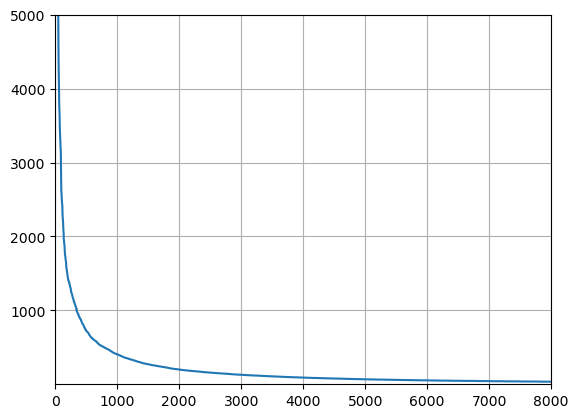

In [11]:
#Plotting graph of no. of words vs frequency 
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [12]:
#taking top 2000 words with max freuqency as our feature
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'not',
 'news',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'apr',
 'lines',
 'date',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'one',
 'writes',
 'ohio',
 'will',
 'talk',
 'article',
 'references',
 'people',
 'misc',
 'don',
 'sender',
 'ans',
 'like',
 'howland',
 'reston',
 'just',
 'sci',
 'university',
 'politics',
 'posting',
 'know',
 'alt',
 'mps',
 'nntp',
 'think',
 'host',
 'rutgers',
 'zaphod',
 'get',
 'usenet',
 'may',
 'rec',
 'also',
 'soc',
 'time',
 'harvard',
 'near',
 'new',
 'good',
 'eng',
 'well',
 'religion',
 'god',
 'even',
 'xref',
 'sei',
 'noc',
 'now',
 'christian',
 'das',
 'see',
 'say',
 'crabapple',
 'use',
 'cis',
 'many',
 'way',
 'right',
 'two',
 'world',
 'first',
 'org',
 'make',
 'much',
 'comp',
 'europa',
 'system',
 'gtefsd',
 'ece',
 'space',
 'uunet',
 'culture',
 'gov',
 'said',
 'club',
 'rochester',
 'distribution',
 'magnesium',
 'believe',
 'really',
 'want',
 'gatech',
 

In [13]:
with open('features.txt', 'w') as f:
    for line in answer1:
        f.write(f"{line}\n")

In [32]:
# mainlist = []
# infile = open('features.txt','r')
# for line in infile:
#     mainlist.append(line.strip())

# infile.close()
# print(mainlist)

['edu', 'cmu', 'com', 'news', 'not', 'srv', 'cantaloupe', 'net', 'message', 'subject', 'lines', 'date', 'apr', 'newsgroups', 'path', 'can', 'organization', 'state', 'gmt', 'ohio', 'one', 'will', 'writes', 'article', 'comp', 'references', 'talk', 'misc', 'ans', 'sender', 'howland', 'reston', 'don', 'like', 'people', 'university', 'just', 'posting', 'nntp', 'know', 'mps', 'host', 'sci', 'get', 'think', 'usenet', 'zaphod', 'may', 'alt', 'politics', 'windows', 'also', 'time', 'use', 'rutgers', 'near', 'harvard', 'eng', 'new', 'rec', 'system', 'crabapple', 'well', 'sei', 'noc', 'good', 'soc', 'das', 'xref', 'now', 'cis', 'even', 'see', 'europa', 'gtefsd', 'max', 'ece', 'world', 'org', 'uunet', 'way', 'religion', 'god', 'two', 'first', 'make', 'much', 'many', 'say', 'gov', 'christian', 'right', 'rochester', 'distribution', 'club', 'space', 'mail', 'andrew', 'want', 'said', 'magnesium', 'gatech', 'anyone', 'reply', 'utexas', 'udel', 'used', 'sun', 'culture', 'ibm', 'need', 'sys', 'work', 'rea

In [14]:
#Making x_train dataset
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #adding frequency corresponding to that word only which is in answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [15]:
len(x_train[0][1])

1268

In [16]:
#Making x_test dataset
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #adding frequency corresponding to that word only which is in answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [17]:
print(x_train_dataset)

[[ 9  3  3 ...  0  0  0]
 [ 7  4  1 ...  0  0  0]
 [ 4  1  2 ...  0  0  0]
 ...
 [12  4  0 ...  0  0  0]
 [26  5  1 ...  0  0  0]
 [ 9  5  6 ...  0  0  0]]


In [18]:
print(x_test_dataset)

[[10  2  3 ...  0  0  0]
 [ 5  4  5 ...  0  0  0]
 [12  3  1 ...  0  0  0]
 ...
 [10  5  3 ...  0  0  0]
 [10  4  2 ...  0  0  0]
 [ 8  2  5 ...  0  0  0]]


In [51]:
# features = []
# infile = open('features.txt','r')
# for line in infile:
#     features.append(line.strip())
# # infile.close()

In [58]:
data

"NEW DELHI: Afghanistan continued their remarkable journey in the ICC ODI World Cup 2023 by pulling off an impressive victory over the 1996 champions Sri Lanka by seven wickets. The foundation for this triumph was laid by Afghanistan's bowlers, who managed to dismiss Sri Lanka for a below-par 241 in 49.3 overs. During the chase, three of Afghanistan's top five batsmen, including Shahidi, contributed with half-centuries in a clinical manner, securing the win in 45.2 overs and elevating Afghanistan to the fifth spot on the points table."

In [60]:
def prediction(data):
    data = [data]
    pred_dataset=np.zeros([len(data),len(features)],int)

    for i in range(len(data)):
        words=data[i].lower()
        word=re.split(r'\W+',words)
        #Iterating over each word
        for j in word:
            #adding frequency corresponding to that word only which is in answer1(feature list)
            if j in features:
                pred_dataset[i][features.index(j)]+=1
                
    pred=clf.predict(pred_dataset)
    return pred

In [61]:
data = "NEW DELHI: Afghanistan continued their remarkable journey in the ICC ODI World Cup 2023 by pulling off an impressive victory over the 1996 champions Sri Lanka by seven wickets. The foundation for this triumph was laid by Afghanistan's bowlers, who managed to dismiss Sri Lanka for a below-par 241 in 49.3 overs. During the chase, three of Afghanistan's top five batsmen, including Shahidi, contributed with half-centuries in a clinical manner, securing the win in 45.2 overs and elevating Afghanistan to the fifth spot on the points table."

pred = prediction(data)

In [63]:
pred[0]

'rec.sport.hockey'

# Inbuilt Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)

#print score on train and test datasets
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print("-----------------------------------------------------------------------")
#printing confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("-----------------------------------------------------------------------")
print("report:")
print(classification_report(y_test,y_pred))


Score on training data: 0.9095607235142119
Score on testing data: 0.89825
-----------------------------------------------------------------------
Confusion Matrix:
[[210   1   0   0   3   1   0   0   5  18   2   0]
 [  0 234   0   0   4  11   0   5   1   0   1   0]
 [  0   3 201   0  21   8   0   2   0   0   2   0]
 [  0   0   4 260   1   1   3   0   1   0   0   0]
 [  0   9   4   0 239   8   2   1   0   0   2   0]
 [  0   9   0   0   6 227   1   1   0   0   0   0]
 [  0   4   3   1  11   4 215   5   0   0   4   2]
 [  0   3   1   0   1   8   0 242   0   0   0   0]
 [  1   3   0   7   6   8   1   5 637  20   1   6]
 [ 75   2   1   0   2   1   1   0  42 378   0   0]
 [  0   1   2   0  12   0   0   1   0   0 230   3]
 [  0   3   0   0   0   8   0   7   0   0   0 520]]
-----------------------------------------------------------------------
report:
                   precision    recall  f1-score   support

          Atheism       0.73      0.88      0.80       240
      Automobiles       

In [21]:
pickle.dump(clf, open("newsgrp_classifier_model.pkl", 'wb'))

# Self Implementation of Naive Bayes

In [22]:
#Making fit function 
def fit(x_train_dataset,y_train):
    count={}   #Making dictionary 
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [23]:
#probablity function
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        if xj==0:
            current_prob=0
        else:
            #with Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [24]:
#Best_class will be returned 
def predict_best_class(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)     
        if first_run or prob>best_prob:     #selecting best class
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [25]:
#predict func
def predict(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_best_class(x,dic))
    return y_pred

In [26]:
#score func
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [27]:
dictionary=fit(x_train_dataset,y_train)    #calling fit func
y_pred=predict(x_test_dataset,dictionary)  #calling predict func

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [29]:
print("Score on testing_data:",score(y_test,y_pred))
print("-----------------------------------------------------------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("-----------------------------------------------------------------------")
print("Report: ")
print(classification_report(y_test,y_pred))


Score on testing_data: 0.9105
-----------------------------------------------------------------------
Confusion Matrix:
[[213   2   0   0   2   0   0   0   4  18   1   0]
 [  0 234   0   0   3  14   1   2   2   0   0   0]
 [  0   1 195   0  26  11   2   0   0   0   2   0]
 [  0   0   4 261   2   0   1   0   1   0   1   0]
 [  0   2   3   0 252   4   3   0   0   0   1   0]
 [  0   6   0   0   7 230   1   0   0   0   0   0]
 [  0   1   3   0   9   1 233   1   0   0   0   1]
 [  0   1   1   0   0   5   0 248   0   0   0   0]
 [  2   1   0   7   3   4   1   3 658  14   1   1]
 [ 75   2   1   0   2   2   1   0  52 367   0   0]
 [  0   0   5   0  17   0   2   0   2   0 221   2]
 [  0   0   0   0   0   5   0   3   0   0   0 530]]
-----------------------------------------------------------------------
Report: 
                   precision    recall  f1-score   support

          Atheism       0.73      0.89      0.80       240
      Automobiles       0.94      0.91      0.92       256
Computer

# Comparision



In [30]:
print("USING IN-BUILT NAIVE BAYES")
print("Score on testing data:",clf.score(x_test_dataset,y_test))

USING IN-BUILT NAIVE BAYES
Score on testing data: 0.89825


In [31]:
print("USING SELF IMPLEMENTED NAIVE BAYES")
print("Score on testing_data:",score(y_test,y_pred))

USING SELF IMPLEMENTED NAIVE BAYES
Score on testing_data: 0.9105


#### score we got from self implementation is more than the score we got from inbuilt naive bayes